In [27]:
import pandas as pd
import censusdata
from tabulate import tabulate
import matplotlib.pyplot as plt

"""
pip install geopandas
"""

'\npip install geopandas\n'

Datasets

1. Crime dataset (2001 to current) - very large, not imported yet (7 million rows)
2. Police station locations
3. Fire station locations
4. List of public schools (as of 2019) (2016-17 data also available)
5. List of Parks maintained by Chicago Park district
6. List of all licensed commercial establishments
7. Police killings in Chicago (Doesn't have lat long, only zipcodes)

# Chicago police district station locations

In [33]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("z8bn-74gv", limit=2000)

# Convert to pandas DataFrame
police_stations = pd.DataFrame.from_records(results)

In [48]:
police_stations['lat'] = ''
police_stations['long'] = ''


for i in range(0,len(police_stations)):
    police_stations['lat'].iloc[i] = police_stations['location'].iloc[i]['latitude']
    police_stations['long'].iloc[i] = police_stations['location'].iloc[i]['longitude']
    

    
police_stations = police_stations[['district','district_name','zip','location','lat','long']]
police_stations

,district,district_name,zip,location,lat,long
0,Headquarters,Headquarters,60653,"{'latitude': '41.8307016873', 'longitude': '-8...",41.8307016873,-87.6233953459
1,18,Near North,60610,"{'latitude': '41.9032416531', 'longitude': '-8...",41.9032416531,-87.6433521393
2,19,Town Hall,60613,"{'latitude': '41.9474004564', 'longitude': '-8...",41.9474004564,-87.651512018
3,20,Lincoln,60625,"{'latitude': '41.9795495131', 'longitude': '-8...",41.9795495131,-87.6928445094
4,22,Morgan Park,60643,"{'latitude': '41.6914347795', 'longitude': '-8...",41.6914347795,-87.6685203937
5,24,Rogers Park,60626,"{'latitude': '41.9997634842', 'longitude': '-8...",41.9997634842,-87.6713242922
6,25,Grand Central,60639,"{'latitude': '41.9186088912', 'longitude': '-8...",41.9186088912,-87.765574479
7,1,Central,60616,"{'latitude': '41.8583725929', 'longitude': '-8...",41.8583725929,-87.627356171
8,2,Wentworth,60609,"{'latitude': '41.8018110912', 'longitude': '-8...",41.8018110912,-87.6305601801
9,3,Grand Crossing,60637,"{'latitude': '41.7664308925', 'longitude': '-8...",41.7664308925,-87.6057478606


# Fire station locations

In [51]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("28km-gtjn", limit=2000)

# Convert to pandas DataFrame
fire_stations_locations = pd.DataFrame.from_records(results)


In [52]:
fire_stations_locations['lat'] = ''
fire_stations_locations['long'] = ''


for i in range(0,len(fire_stations_locations)):
    fire_stations_locations['lat'].iloc[i] = fire_stations_locations['location'].iloc[i]['latitude']
    fire_stations_locations['long'].iloc[i] = fire_stations_locations['location'].iloc[i]['longitude']
    

    
fire_stations_locations = fire_stations_locations[['name','address','zip','location','lat','long']]
fire_stations_locations

,name,address,zip,location,lat,long
0,E5,324 S DESPLAINES ST,60661,"{'latitude': '41.877028304420755', 'longitude'...",41.877028304420755,-87.64430865193455
1,E11,5343 N CUMBERLAND AVE,60656,"{'latitude': '41.97685625348317', 'longitude':...",41.97685625348317,-87.836495886321
2,E81,10458 S HOXIE AVE,60617,"{'latitude': '41.705334319654064', 'longitude'...",41.705334319654064,-87.56088524816063
3,E22,605 W ARMITAGE AVE,60614,"{'latitude': '41.91792047709303', 'longitude':...",41.91792047709303,-87.64396690956342
4,E50,5000 S UNION AVE,60609,"{'latitude': '41.80344788181221', 'longitude':...",41.80344788181221,-87.64299386409898
...,...,...,...,...,...,...
87,E19,3421 S CALUMET AVE,60616,"{'latitude': '41.83227804024279', 'longitude':...",41.83227804024279,-87.61779663851078
88,E26,10 N LEAVITT ST,60612,"{'latitude': '41.88151592134697', 'longitude':...",41.88151592134697,-87.68185534665783
89,E82,817 E 91ST ST,60619,"{'latitude': '41.72933327959225', 'longitude':...",41.72933327959225,-87.60425730151255
90,E34,4034 W 47TH ST,60632,"{'latitude': '41.80790024096418', 'longitude':...",41.80790024096418,-87.72485128276466


# Public Schools (as of 2019)

In [64]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("tz49-n8ze", limit=2000)

# Convert to pandas DataFrame
schools = pd.DataFrame.from_records(results)


In [65]:
schools = schools.rename(columns = {'x':'long','y':'lat'})
schools = schools[['school_id','school_nm','sch_type','lat','long']]
schools

,school_id,school_nm,sch_type,lat,long
0,610587,DYETT ARTS HS,Traditional,41.80120417,-87.61223911
1,400111,LEARN - PERKINS,Traditional,41.74312177,-87.66572106
2,610568,PATHWAYS - AVONDALE HS,Options,41.93943321,-87.70520632
3,610027,KIPLING,Traditional,41.72362691,-87.63952072
4,609712,HIRSCH HS,Traditional,41.75374796,-87.60172727
...,...,...,...,...,...
649,610200,THORP J,Traditional,41.73332424,-87.54427998
650,610139,PULLMAN,Traditional,41.68881935,-87.60943097
651,610026,KINZIE,Traditional,41.78996463,-87.7794826
652,609844,CARTER,Traditional,41.78982791,-87.62245275


# Parks (maintained by Chicago Park district)

In [18]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("y7qa-tvqx", limit=5000)

# Convert to pandas DataFrame
parks = pd.DataFrame.from_records(results)

In [19]:
parks['lat'] = ''
parks['long'] = ''


for i in range(0,len(parks)):
    parks['lat'].iloc[i] = parks['location'].iloc[i]['latitude']
    parks['long'].iloc[i] = parks['location'].iloc[i]['longitude']
    

    
parks = parks[['park','park_number','location','lat','long']]
parks = parks.drop_duplicates(subset = ['park_number'])

In [20]:
parks

,park,park_number,location,lat,long
0,ABBOTT (ROBERT),259,"{'latitude': '41.72096', 'longitude': '-87.621...",41.72096,-87.621351
10,ADA (SAWYER GARRETT),45,"{'latitude': '41.687785', 'longitude': '-87.65...",41.687785,-87.655389
26,ADAMS (GEORGE & ADELE),1019,"{'latitude': '41.91689', 'longitude': '-87.655...",41.91689,-87.655092
28,AIELLO (JOHN),1280,"{'latitude': '41.919151', 'longitude': '-87.77...",41.919151,-87.776356
29,ALGONQUIN,1161,"{'latitude': '41.935202', 'longitude': '-87.69...",41.935202,-87.694918
...,...,...,...,...,...
3997,ROWAN (WILLIAM),248,"{'latitude': '41.686061', 'longitude': '-87.53...",41.686061,-87.538167
4022,RUTHERFORD SAYRE,127,"{'latitude': '41.920557', 'longitude': '-87.79...",41.920557,-87.795929
4051,SCHAEFER (EDWARD),1148,"{'latitude': '41.925746', 'longitude': '-87.66...",41.925746,-87.669035
4060,SENECA,1242,"{'latitude': '41.897006', 'longitude': '-87.62...",41.897006,-87.622414


# Commerical establishments

In [89]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("uupf-x98q", limit=60000)

# Convert to pandas DataFrame
comm_est = pd.DataFrame.from_records(results)

In [95]:
comm_est.dropna(subset = ['location'], inplace = True)

comm_est['lat'] = ''
comm_est['long'] = ''

#Loop takes some time to run
for i in range(0,len(comm_est)):
    comm_est['lat'].iloc[i] = comm_est['location'].iloc[i]['latitude']
    comm_est['long'].iloc[i] = comm_est['location'].iloc[i]['longitude']
    

    
comm_est = comm_est[['zip_code','license_description','license_id','police_district','location','lat','long']]
comm_est

,zip_code,license_description,license_id,police_district,location,lat,long
0,60613,Limited Business License,2785648,NaN,"{'latitude': '41.950263533361316', 'human_addr...",41.950263533361316,-87.64943628585584
2,60657,Shared Kitchen User (Long Term),2757823,NaN,"{'latitude': '41.93595774945094', 'human_addre...",41.93595774945094,-87.66720798565429
3,60647,Tobacco,2809999,14,"{'latitude': '41.909910705082176', 'human_addr...",41.909910705082176,-87.71438551021203
4,60616,Shared Kitchen User (Long Term),2753953,9,"{'latitude': '41.84627489231545', 'human_addre...",41.84627489231545,-87.63563380347186
5,60647,Shared Kitchen User (Long Term),2749193,NaN,"{'latitude': '41.92328087256676', 'human_addre...",41.92328087256676,-87.68648711287192
...,...,...,...,...,...,...,...
54456,60611,Valet Parking Operator,2785820,18,"{'latitude': '41.89475436857259', 'human_addre...",41.89475436857259,-87.6243943466027
54457,60601,Valet Parking Operator,2791661,1,"{'latitude': '41.88637481521078', 'human_addre...",41.88637481521078,-87.6246754356595
54458,60608,Commercial Garage,2797818,12,"{'latitude': '41.85598353104698', 'human_addre...",41.85598353104698,-87.67314851164002
54459,60603,Valet Parking Operator,2802760,1,"{'latitude': '41.88066457839605', 'human_addre...",41.88066457839605,-87.6270893644417


# Police Killings

In [99]:
police_deaths = pd.read_csv("police_killings_MPV.csv")

df_mask = police_deaths['City'] == "Chicago"
police_deaths = police_deaths[df_mask]
police_deaths = police_deaths[['Date of Incident (month/day/year)','City','Zipcode','Agency responsible for death','Cause of death','MPV ID']]
police_deaths

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date of Incident (month/day/year),City,Zipcode,Agency responsible for death,Cause of death,MPV ID
1,05/09/2020,Chicago,60638.0,Chicago Police Department,Gunshot,8446
14,31/08/2020,Chicago,60608.0,Chicago Police Department,Gunshot,8438
663,09/02/2020,Chicago,60613.0,Chicago Police Department,Gunshot,7780
769,04/01/2020,Chicago,60649.0,Chicago Police Department,"Gunshot, Taser",7676
772,02/01/2020,Chicago,60639.0,Chicago Police Department,Gunshot,7670
...,...,...,...,...,...,...
7907,16/06/2013,Chicago,60623.0,Chicago Police Department,Gunshot,518
8061,05/05/2013,Chicago,60623.0,Chicago Police Department,Gunshot,370
8212,16/03/2013,Chicago,60625.0,Chicago Police Department,Gunshot,217
8221,14/03/2013,Chicago,60624.0,Chicago Police Department,Gunshot,208


In [ ]:
# Ignore this section, was trying to selectively import the crimes dataset (still huge)

In [108]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ijzp-q8t2", limit=200000, year = 2020)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [112]:
results_df['year'].drop_duplicates()

0    2020
Name: year, dtype: object

# Adding census tract information

In [22]:
import geopandas as gpd
from shapely import wkt
acs = pd.read_csv("/Users/abhilashbiswas/Desktop/Data Mining/Project/Git/data/CleanACSFile.csv")

acs['geometry'] = acs['geometry'].apply(wkt.loads)
gdf_acs = gpd.GeoDataFrame(acs, crs = 'epsg:4326')

gdf_acs


,geo_id,DP02_0002PE,DP02_0004PE,DP02_0006PE,DP02_0010PE,DP02_0014PE,DP02_0015PE,DP02_0016E,DP02_0017E,DP02_0022PE,...,DP05_0018E,DP05_0019PE,DP05_0024PE,DP05_0037PE,DP05_0038PE,DP05_0044PE,DP05_0058PE,DP05_0071PE,geometry,GEOID10
0,1400000US17031010100,23.8,2.5,39.5,34.2,21.5,8.7,1.89,3.05,25.4,...,35.6,19.9,6.0,46.7,45.2,1.0,3.4,11.4,"MULTIPOLYGON (((-87.67720 42.02294, -87.67007 ...",17031010100
1,1400000US17031010201,33.7,7.2,28.3,30.8,28.2,14.9,2.65,3.50,34.5,...,34.8,25.6,6.8,46.4,33.8,4.0,8.0,22.4,"MULTIPOLYGON (((-87.68465 42.01949, -87.68045 ...",17031010201
2,1400000US17031010202,23.1,13.6,23.0,40.4,26.9,17.9,2.27,3.31,25.1,...,35.0,20.3,13.1,46.7,33.9,5.4,1.4,26.0,"MULTIPOLYGON (((-87.67685 42.01941, -87.67339 ...",17031010202
3,1400000US17031010300,25.3,7.4,25.2,42.1,17.0,18.7,1.80,2.79,20.0,...,42.2,14.5,18.5,59.6,30.9,1.0,4.2,16.9,"MULTIPOLYGON (((-87.67133 42.01937, -87.66950 ...",17031010300
4,1400000US17031010400,17.4,5.7,36.4,40.5,12.5,10.7,1.82,2.93,16.8,...,25.2,10.7,5.0,70.8,21.3,4.6,1.8,7.5,"MULTIPOLYGON (((-87.66345 42.01283, -87.66133 ...",17031010400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,1400000US17031843500,33.0,22.8,25.6,18.6,50.9,10.2,3.58,4.03,44.1,...,29.9,3.7,2.2,31.0,63.4,0.3,0.0,26.3,"MULTIPOLYGON (((-87.70504 41.84452, -87.70258 ...",17031843500
794,1400000US17031843600,12.5,8.8,18.9,59.7,28.4,20.9,2.06,2.90,32.5,...,33.6,26.9,11.7,7.6,87.6,0.9,2.4,7.9,"MULTIPOLYGON (((-87.61150 41.81128, -87.60661 ...",17031843600
795,1400000US17031843700,51.3,5.6,17.9,25.1,39.6,22.4,2.55,3.50,32.6,...,35.8,27.9,9.8,80.0,4.0,6.7,6.4,25.7,"MULTIPOLYGON (((-87.69676 41.95046, -87.69445 ...",17031843700
796,1400000US17031843800,19.8,9.5,31.9,38.8,32.4,32.5,2.23,3.04,31.1,...,39.9,22.4,17.4,25.8,66.4,7.3,0.5,7.0,"MULTIPOLYGON (((-87.64554 41.80886, -87.64068 ...",17031843800


In [25]:
gdf_parks = gpd.GeoDataFrame(
    parks, geometry=gpd.points_from_xy(parks.long, parks.lat), crs = 'epsg:4326')

parks_acs = gpd.sjoin(gdf_parks, gdf_acs[['geo_id','geometry']], how='left' )

parks_acs

,park,park_number,location,lat,long,geometry,index_right,geo_id
0,ABBOTT (ROBERT),259,"{'latitude': '41.72096', 'longitude': '-87.621...",41.72096,-87.621351,POINT (-87.62135 41.72096),482.0,1400000US17031490500
10,ADA (SAWYER GARRETT),45,"{'latitude': '41.687785', 'longitude': '-87.65...",41.687785,-87.655389,POINT (-87.65539 41.68778),679.0,1400000US17031750600
26,ADAMS (GEORGE & ADELE),1019,"{'latitude': '41.91689', 'longitude': '-87.655...",41.91689,-87.655092,POINT (-87.65509 41.91689),709.0,1400000US17031832600
28,AIELLO (JOHN),1280,"{'latitude': '41.919151', 'longitude': '-87.77...",41.919151,-87.776356,POINT (-87.77636 41.91915),231.0,1400000US17031191301
29,ALGONQUIN,1161,"{'latitude': '41.935202', 'longitude': '-87.69...",41.935202,-87.694918,POINT (-87.69492 41.93520),246.0,1400000US17031210900
...,...,...,...,...,...,...,...,...
3997,ROWAN (WILLIAM),248,"{'latitude': '41.686061', 'longitude': '-87.53...",41.686061,-87.538167,POINT (-87.53817 41.68606),504.0,1400000US17031520600
4022,RUTHERFORD SAYRE,127,"{'latitude': '41.920557', 'longitude': '-87.79...",41.920557,-87.795929,POINT (-87.79593 41.92056),699.0,1400000US17031831600
4051,SCHAEFER (EDWARD),1148,"{'latitude': '41.925746', 'longitude': '-87.66...",41.925746,-87.669035,POINT (-87.66903 41.92575),115.0,1400000US17031070700
4060,SENECA,1242,"{'latitude': '41.897006', 'longitude': '-87.62...",41.897006,-87.622414,POINT (-87.62241 41.89701),134.0,1400000US17031081300


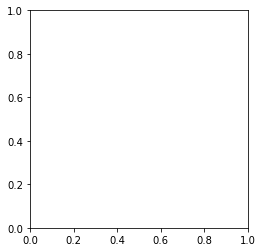

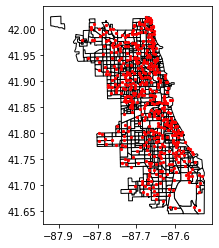

In [31]:
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using geopandas plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

base = gdf_acs.plot(color = "white", edgecolor = "black")
parks_acs.plot(ax = base, marker = 'o', color = 'red', markersize = 5)

plt.show();






In [37]:
parks_acs.iloc[0]



park                                             ABBOTT (ROBERT)
park_number                                                  259
location       {'latitude': '41.72096', 'longitude': '-87.621...
lat                                                     41.72096
long                                                  -87.621351
geometry                             POINT (-87.621351 41.72096)
index_right                                                482.0
geo_id                                      1400000US17031490500
Name: 0, dtype: object